In [1]:
%run -i '../../lib/fetch-data.py'

Data already downloaded, skipping...


# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib
import re

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from lib.readdatautils import *

In [5]:
allUsers_df = generate_data_allUsers()
allUsers_df = allUsers_df.set_index('UserId')

/Users/juliatessler/Repos/mo810/lib/readdatautils.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=Tr

In [6]:
allUsers_df.head()


,Age,Cap/Zip-Code,Countries visited,Fave Sports,Gender,Home country,Home town,Income,Last Name,Most listened musics,...,fave6,fave7,fave8,fave9,unfave1,unfave2,unfave3,unfave4,unfave5,unfave6
UserId,,,,,,,,,,,,,,,,,,,,,
U0001,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,Hidden,"Classical Music, Easy Listening, Jazz",...,NaN,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN
U0002,26,60638,"Poland, Mexico, United States of America",Nothing,F,United States of America,Chicago,1,Hidden,"Dance Music, Electronic Music, Indie Pop, Pop ...",...,NaN,NaN,NaN,NaN,seafood fish,pizza,bacon,bad odor,doglicks,NaN
U0003,22,54942,France,"Team sports (Footbal, Baseball, Rugby, ...)",M,United States of America,Greenville,1,Hidden,"Hip Hop - Rap, Dance Music, Electronic Music, ...",...,NaN,NaN,NaN,NaN,Ew,Useless,Ice Cream,Play Dog,More Sweets,NaN
U0004,24,NW1 1EU,"United States of America, United Kingdom, Ital...","Individual sports‎ (Tennis, Archery, ...)",F,Great Britain,London,1,Hidden,"Alternative Music, Pop (Popular music), Rock",...,NaN,NaN,NaN,NaN,The word Moist,The word Crusty,Gross Toenails,Eye Crust,Nose Picking,NaN
U0005,34,10000,"Russia, Slovakia, Slovenia, China, India, Fran...","Individual sports‎ (Tennis, Archery, ...)",F,Czech Republic,Prague,1,Hidden,"Electronic Music, Asian Pop (J-Pop or K-pop), ...",...,NaN,NaN,NaN,NaN,Fat people,Hairy bodies,Dirty hair,"Nicab, paranja",Junkies,NaN


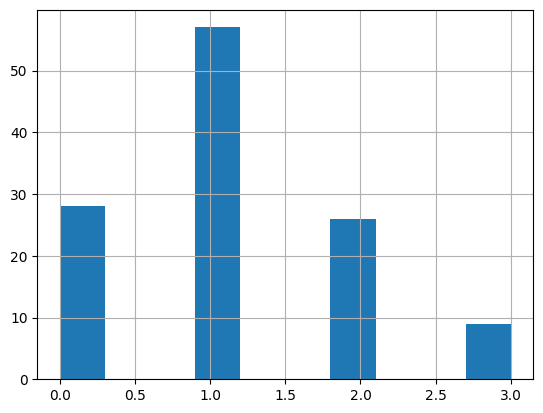

In [7]:
allUsers_df['Income'].hist();

In [8]:
allUsers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, U0001 to U0120
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         120 non-null    int64 
 1   Cap/Zip-Code                120 non-null    object
 2   Countries visited           120 non-null    object
 3   Fave Sports                 120 non-null    object
 4   Gender                      120 non-null    object
 5   Home country                120 non-null    object
 6   Home town                   120 non-null    object
 7   Income                      120 non-null    int64 
 8   Last Name                   120 non-null    object
 9   Most listened musics        120 non-null    object
 10  Most read books             120 non-null    object
 11  Most visited websites       120 non-null    object
 12  Most watched movies         120 non-null    object
 13  Most watched tv programmes  120 non-null    objec

In [9]:
allUsers_df.to_csv("../../data/AllUsers.csv", index=True)


In [10]:
adCats_df = generate_data_adCats()
adCats_df = adCats_df.set_index('AdCatId')

In [11]:
adCats_df.head()


,AdCatName,AdCatNumAds
AdCatId,,
01,Clothing & Shoes,16
02,Automotive,15
03,Baby Products,15
04,Health & Beauty,15
05,Media (BMVD),15


In [12]:
adCats_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 01 to 20
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AdCatName    20 non-null     object
 1   AdCatNumAds  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [13]:
adCats_df.to_csv("../../data/AdCats.csv", index=True)


In [14]:
allAds_df = generate_data_allAds()


/Users/juliatessler/Repos/mo810/lib/readdatautils.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allAds_df = allAds_df.append(part1Ads_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:142: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allAds_df = allAds_df.append(part2Ads_df, sort=True)


In [15]:
allAds_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, A01_01 to A20_15
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AdFilePath  301 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


In [16]:
allAds_df.head()


,AdFilePath
AdId,
A01_01,../../data/ads16-dataset/ADS16_Benchmark_part1...
A01_02,../../data/ads16-dataset/ADS16_Benchmark_part1...
A01_03,../../data/ads16-dataset/ADS16_Benchmark_part1...
A01_04,../../data/ads16-dataset/ADS16_Benchmark_part1...
A01_05,../../data/ads16-dataset/ADS16_Benchmark_part1...


In [17]:
allAds_df.to_csv("../../data/AllAds.csv", index=True)


In [18]:
allUsers_And_Ads_df = df_crossjoin(allUsers_df, allAds_df)


In [19]:
allUsers_And_Ads_df.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36120 entries, ('U0001', 'A01_01') to ('U0120', 'A20_15')
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         36120 non-null  int64 
 1   Cap/Zip-Code                36120 non-null  object
 2   Countries visited           36120 non-null  object
 3   Fave Sports                 36120 non-null  object
 4   Gender                      36120 non-null  object
 5   Home country                36120 non-null  object
 6   Home town                   36120 non-null  object
 7   Income                      36120 non-null  int64 
 8   Last Name                   36120 non-null  object
 9   Most listened musics        36120 non-null  object
 10  Most read books             36120 non-null  object
 11  Most visited websites       36120 non-null  object
 12  Most watched movies         36120 non-null  object
 13  Most watched t

In [20]:
allUsers_And_Ads_df = allUsers_And_Ads_df.reset_index()
allUsers_And_Ads_df.rename(columns={'level_0':'UserId'}, inplace=True)
allUsers_And_Ads_df.rename(columns={'level_1':'AdId'}, inplace=True)
allUsers_And_Ads_df.head(302)

,UserId,AdId,Age,Cap/Zip-Code,Countries visited,Fave Sports,Gender,Home country,Home town,Income,...,fave7,fave8,fave9,unfave1,unfave2,unfave3,unfave4,unfave5,unfave6,AdFilePath
0,U0001,A01_01,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
1,U0001,A01_02,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
2,U0001,A01_03,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
3,U0001,A01_04,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
4,U0001,A01_05,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,U0001,A20_12,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part2...
298,U0001,A20_13,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part2...
299,U0001,A20_14,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part2...
300,U0001,A20_15,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part2...


In [21]:
allUsers_And_Ads_df.to_csv("../../data/AllUsers_And_Ads.csv", index=False)


In [22]:
allUsersRatings_df = generate_data_RatingsAllUsers()


/Users/juliatessler/Repos/mo810/lib/readdatautils.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sort=True)
/Users/juliatessler/Repos/mo810/lib/readdatautils.py:196: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  partUsers_df = partUsers_df.append(thisUser_df, sor

In [23]:
allUsersRatings_df.rename(columns={0:'Rating'}, inplace=True)


In [24]:
allUsersRatings_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  36000 non-null  float64
dtypes: float64(1)
memory usage: 562.5+ KB


In [25]:
allUsersRatings_df.head(301)


,Rating
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
296,1.0
297,1.0
298,1.0
299,1.0


In [26]:
allUsers_And_Ads_df.head()


,UserId,AdId,Age,Cap/Zip-Code,Countries visited,Fave Sports,Gender,Home country,Home town,Income,...,fave7,fave8,fave9,unfave1,unfave2,unfave3,unfave4,unfave5,unfave6,AdFilePath
0,U0001,A01_01,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
1,U0001,A01_02,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
2,U0001,A01_03,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
3,U0001,A01_04,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...
4,U0001,A01_05,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...


In [27]:
allUsersRatings_df.head()


,Rating
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [28]:
allUsers_And_Ads_df.reset_index(drop=True, inplace=True)
allUsersRatings_df.reset_index(drop=True, inplace=True)
allUsers_Ads_Ratings_df = pd.concat([allUsers_And_Ads_df, allUsersRatings_df], axis=1)


In [29]:
allUsers_Ads_Ratings_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36120 entries, 0 to 36119
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserId                      36120 non-null  object 
 1   AdId                        36120 non-null  object 
 2   Age                         36120 non-null  int64  
 3   Cap/Zip-Code                36120 non-null  object 
 4   Countries visited           36120 non-null  object 
 5   Fave Sports                 36120 non-null  object 
 6   Gender                      36120 non-null  object 
 7   Home country                36120 non-null  object 
 8   Home town                   36120 non-null  object 
 9   Income                      36120 non-null  int64  
 10  Last Name                   36120 non-null  object 
 11  Most listened musics        36120 non-null  object 
 12  Most read books             36120 non-null  object 
 13  Most visited websites       361

In [30]:
allUsers_Ads_Ratings_df.head(5)


,UserId,AdId,Age,Cap/Zip-Code,Countries visited,Fave Sports,Gender,Home country,Home town,Income,...,fave8,fave9,unfave1,unfave2,unfave3,unfave4,unfave5,unfave6,AdFilePath,Rating
0,U0001,A01_01,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...,1.0
1,U0001,A01_02,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...,1.0
2,U0001,A01_03,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...,1.0
3,U0001,A01_04,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...,1.0
4,U0001,A01_05,62,15613,United States of America,I do not like Sports,F,United States of America,Apollo,1,...,NaN,NaN,news headlines,homelessness,violence,war,human rights,NaN,../../data/ads16-dataset/ADS16_Benchmark_part1...,1.0


In [31]:
allUsers_Ads_Ratings_df.to_csv("../../data/AllUsers_Ads_Ratings_df.csv", index=False)


In [32]:
allUsers_Ads_Ratings_df['Weekly working hours'].unique()

array(['Full Time', 'Part Time'], dtype=object)